This Jupyter notebook generates key figures and tables (Figures 4, 5, 6, 7, and Table 4) presented in the AlphaViT research paper (https://arxiv.org/abs/2408.13871).

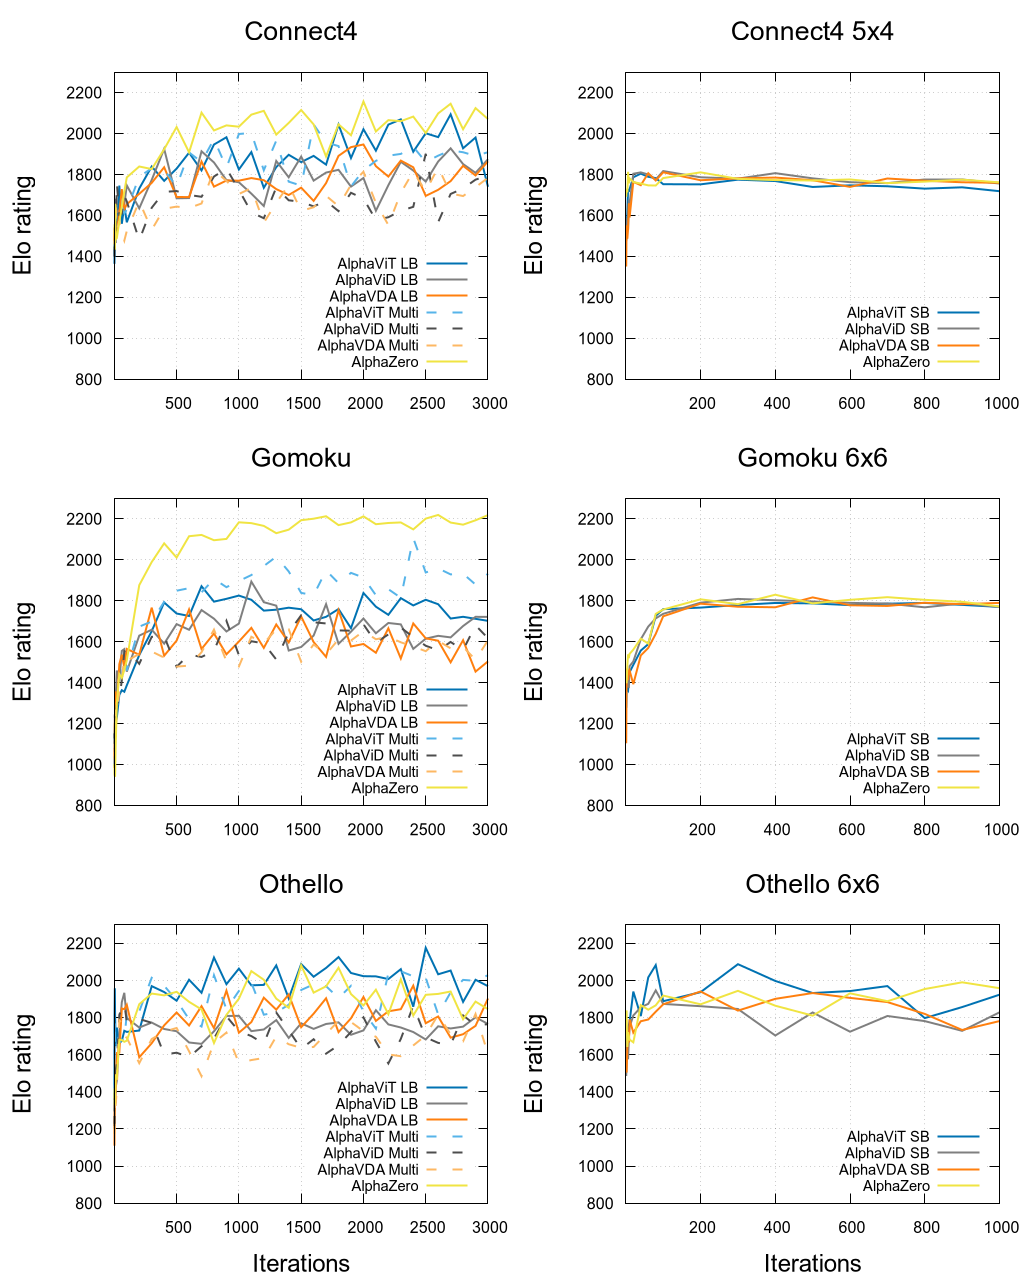

In [1]:
#========================================================================
#  Figure 4
#========================================================================

import os, subprocess
from IPython.display import Image, display

def run_plot_portrait():
    cwd      = os.getcwd()
    host_dir = os.path.join(cwd, "EloRating")    
    cmd = (
        f"docker run --rm "
        f"-v {host_dir}:/temp "
        f"gnuplot "
        f"sh -c \"cd /temp && gnuplot plot_portrait.plt\""
    )
    subprocess.run(cmd, shell=True, check=True)    
    display(Image(os.path.join(host_dir, "Fig4.png")))

run_plot_portrait()

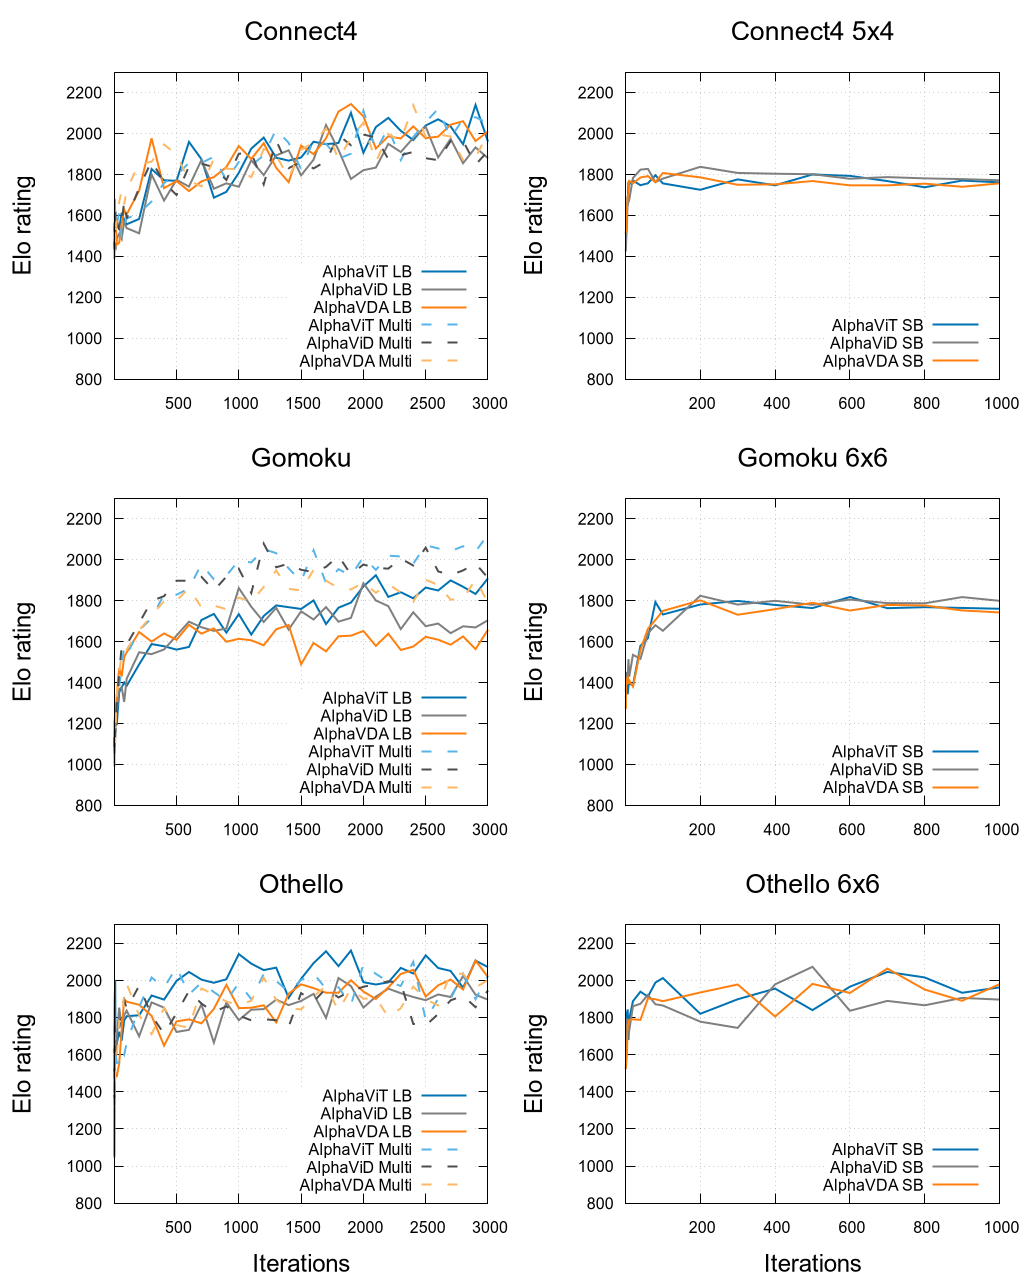

In [2]:
#========================================================================
#  Figure 5
#========================================================================

import os, subprocess
from IPython.display import Image, display

def run_plot_portrait():
    cwd      = os.getcwd()
    host_dir = os.path.join(cwd, "EloRating_Deep")    
    cmd = (
        f"docker run --rm "
        f"-v {host_dir}:/temp "
        f"gnuplot "
        f"sh -c \"cd /temp && gnuplot plot_portrait.plt\""
    )
    subprocess.run(cmd, shell=True, check=True)    
    display(Image(os.path.join(host_dir, "Fig5.png")))

run_plot_portrait()

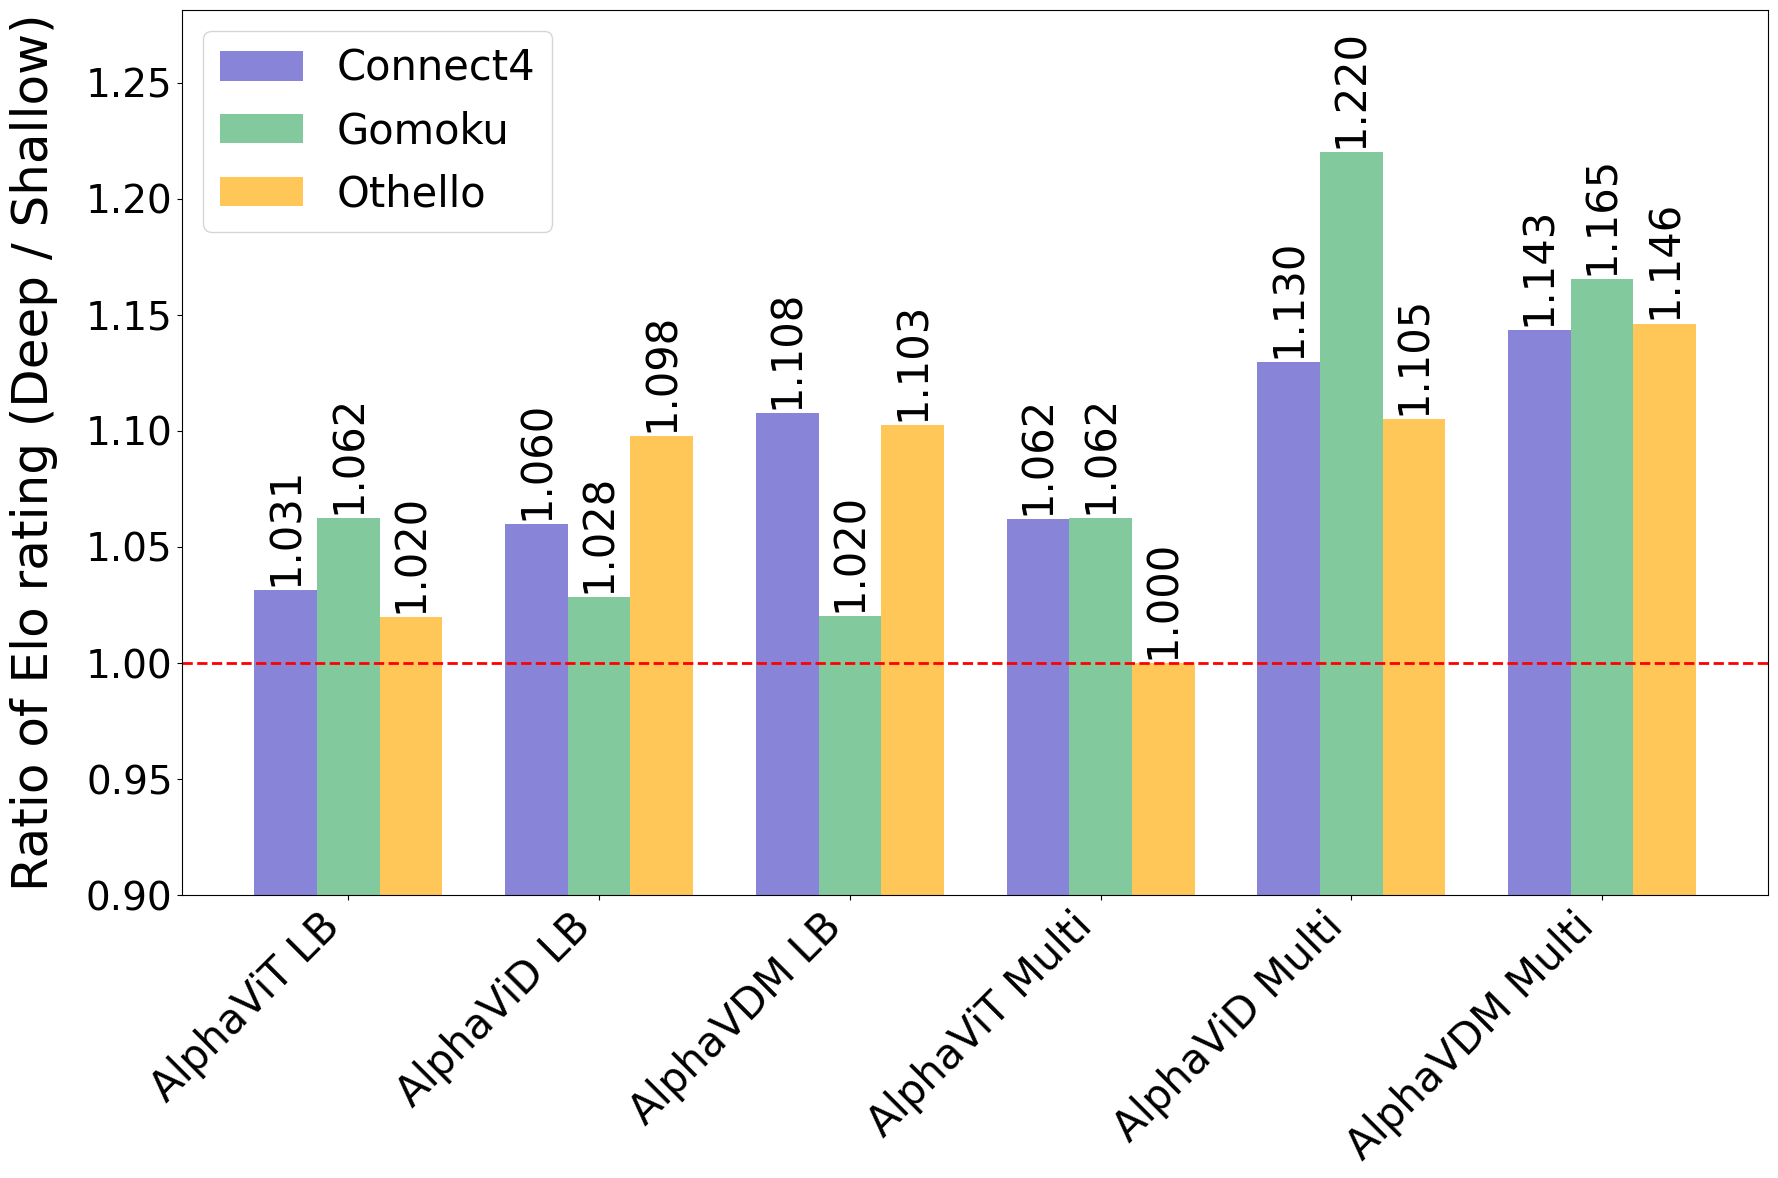

In [3]:
#========================================================================
#  Figure 6
#========================================================================

import matplotlib.pyplot as plt
import numpy as np

# Increase the default font size
plt.rcParams.update({'font.size': 14})

# Data
models = ['AlphaViT LB', 'AlphaViD LB', 'AlphaVDM LB', 'AlphaViT Multi', 'AlphaViD Multi', 'AlphaVDM Multi']

# Shallow networks (L1 or L4)
connect4_shallow = [
    1966.1249295369003,
    1813.701626457568 ,
    1801.9101457753775,
    1896.9028732164097,
    1690.3522703686263,
    1721.0599529677481
]
gomoku_shallow = [
    1752.7272299889312,
    1656.4921902268932,
    1570.3542795689614,
    1917.084593097477 ,
    1611.4484476719956,
    1582.7547695758758
]
othello_shallow = [
    2006.5152952504577,
    1756.3593496006154,
    1806.6301400700838,
    1964.388824172708 ,
    1711.346453974265 ,
    1686.1244883869817
]

# Deep networks (L5 or L8)
connect4_deep = [
    2027.6732358340214,
    1922.3696808357781,
    1995.9191741522088,
    2014.6641631916805,
    1909.4430435839924,
    1967.9310854289579]
gomoku_deep = [
    1862.0556989597767,
    1703.5053557987235,
    1602.1222923550738,
    2036.5743807825238,
    1966.3463941920418,
    1844.3202735790994]
othello_deep = [
    2046.1785089450623,
    1927.9119518967861,
    1991.9175025557913,
    1964.5933361664108,
    1891.4788290474255,
    1932.6715174470053]


# Calculate ratios (deep / shallow)
connect4_ratio = [d/s for d, s in zip(connect4_deep, connect4_shallow)]
gomoku_ratio = [d/s for d, s in zip(gomoku_deep, gomoku_shallow)]
othello_ratio = [d/s for d, s in zip(othello_deep, othello_shallow)]

# Set up the plot
fig, ax = plt.subplots(figsize=(18, 12))
width = 0.25
x = np.arange(len(models))

# Create bars
rects1 = ax.bar(x - width, connect4_ratio, width, label='Connect4', color='#8884d8')
rects2 = ax.bar(x, gomoku_ratio, width, label='Gomoku', color='#82ca9d')
rects3 = ax.bar(x + width, othello_ratio, width, label='Othello', color='#ffc658')

# Customize the plot
ax.set_ylabel('Ratio of Elo rating (Deep / Shallow)', fontsize=36, labelpad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=30)
ax.tick_params(axis='y', labelsize=28)
ax.legend(fontsize=30)

# Add a horizontal line at y=1
ax.axhline(y=1, color='r', linestyle='--', linewidth=2)

# Set y-axis to start from 0.9 for better visibility of differences
ax.set_ylim(0.9, max(max(connect4_ratio), max(gomoku_ratio), max(othello_ratio)) * 1.05)

# Add value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90, fontsize=30)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Adjust the layout and display the plot
plt.tight_layout()
#plt.savefig("Fig6.pdf")

plt.show()

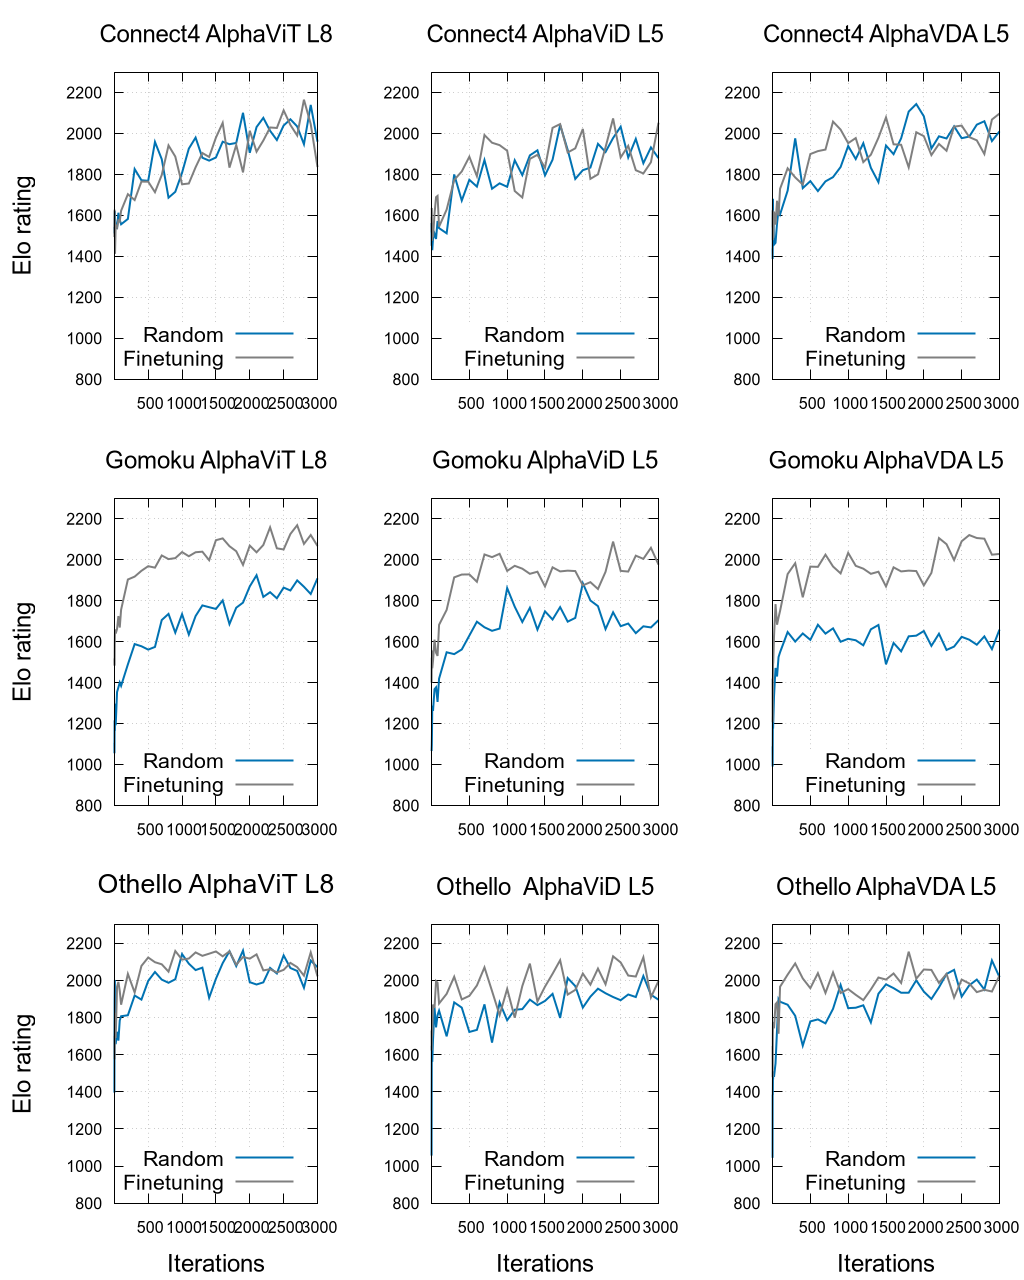

In [4]:
#========================================================================
#  Figure 7
#========================================================================

import os, subprocess
from IPython.display import Image, display

def run_plot_portrait():
    cwd      = os.getcwd()
    host_dir = os.path.join(cwd, ".")    
    cmd = (
        f"docker run --rm "
        f"-v {host_dir}:/temp "
        f"gnuplot "
        f"sh -c \"cd /temp && gnuplot plot_portrait.plt\""
    )
    subprocess.run(cmd, shell=True, check=True)    
    display(Image(os.path.join(host_dir, "Fig7.png")))

run_plot_portrait()

In [5]:
import numpy as np
import pandas as pd
from tabulate import tabulate

# 1) two name‐maps
shallow_map = {
    'AlphaViT_Large_Test.dat':    'AlphaViT L4 LB',
    'AlphaViD_Large_Test.dat':    'AlphaViD L1 LB',
    'AlphaVDA_Large_Test.dat':    'AlphaVDA L1 LB',
    'AlphaViT_Multi_Test.dat':    'AlphaViT L4 Multi',
    'AlphaViD_Multi_Test.dat':    'AlphaViD L1 Multi',
    'AlphaVDA_Multi_Test.dat':    'AlphaVDA L1 Multi',
    'AlphaZero_Test.dat':         'AlphaZero',
}

deep_map = {
    'AlphaViT_Large_Test.dat':    'AlphaViT L8 LB',
    'AlphaViD_Large_Test.dat':    'AlphaViD L5 LB',
    'AlphaVDA_Large_Test.dat':    'AlphaVDA L5 LB',
    'AlphaViT_Multi_Test.dat':    'AlphaViT L8 Multi',
    'AlphaViD_Multi_Test.dat':    'AlphaViD L5 Multi',
    'AlphaVDA_Multi_Test.dat':    'AlphaVDA L5 Multi',
}

dir_to_map = {
    "EloRating":      shallow_map,
    "EloRating_Deep": deep_map,
}

# 2) exact row‐order you want
order = [
    'AlphaViT L4 LB',
    'AlphaViT L8 LB',
    'AlphaViD L1 LB',
    'AlphaViD L5 LB',
    'AlphaVDA L1 LB',
    'AlphaVDA L5 LB',
    'AlphaViT L4 Multi',
    'AlphaViT L8 Multi',
    'AlphaViD L1 Multi',
    'AlphaViD L5 Multi',
    'AlphaVDA L1 Multi',
    'AlphaVDA L5 Multi',
    'AlphaZero'
]

dirs   = ["EloRating", "EloRating_Deep"]
games  = ["Connect4", "Gomoku", "Othello"]
files  = list(shallow_map.keys())   # same keys for shallow + deep

# 3) collect all rows
rows = []
for d in dirs:
    m = dir_to_map[d]
    for f in files:
        if d == "EloRating_Deep" and f == "AlphaZero_Test.dat":
            continue  # skip deep AlphaZero
        label = m[f]
        means = []
        for g in games:
            data = np.loadtxt(f"{d}/{g}/{f}")
            segment = data[(data[:,0] >= 2100) & (data[:,0] <= 3000), 1]
            means.append(np.mean(segment))
        rows.append([label] + means)

# 4) build DataFrame and enforce order
df = pd.DataFrame(rows, columns=["Model"] + games).set_index("Model")
df = df.reindex(order)

# 5) print Markdown table
print(tabulate(df, headers="keys", tablefmt="github", floatfmt=".0f"))


| Model             |   Connect4 |   Gomoku |   Othello |
|-------------------|------------|----------|-----------|
| AlphaViT L4 LB    |       1966 |     1753 |      2007 |
| AlphaViT L8 LB    |       2028 |     1862 |      2046 |
| AlphaViD L1 LB    |       1814 |     1656 |      1756 |
| AlphaViD L5 LB    |       1922 |     1704 |      1928 |
| AlphaVDA L1 LB    |       1802 |     1570 |      1807 |
| AlphaVDA L5 LB    |       1996 |     1602 |      1992 |
| AlphaViT L4 Multi |       1897 |     1917 |      1964 |
| AlphaViT L8 Multi |       2015 |     2037 |      1965 |
| AlphaViD L1 Multi |       1690 |     1611 |      1711 |
| AlphaViD L5 Multi |       1909 |     1966 |      1891 |
| AlphaVDA L1 Multi |       1721 |     1583 |      1686 |
| AlphaVDA L5 Multi |       1968 |     1844 |      1933 |
| AlphaZero         |       2068 |     2187 |      1890 |
